# Historial Clínico: Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")

### 1) Check preproccessing data is needed

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


 _Description:_
1) Age: Age
2) anemia: If the patient has anemia (Yes = 1/NO = 0)
3) Creatine: Level of creatinine
4) diabitis: If the patient has diabitis (Yes = 1/NO = 0)
5) ejection: It's a percentage
6) High preasur: If the patient has high blood preasure (Yes = 1/NO = 0)
7) Platelets: Count of platelets in blood
8) serum creatininee: level of serum creatinine
9) serum sodium: level of serum sodium
10) sex: if the patient is a male (Yes = 1/NO = 0)
11) smoking: if the patient smokes (Yes = 1/NO = 0)
12) time: time of the observation period
13) DEATH_EVENT: if the patient dies (Yes = 1/NO = 0)

In [22]:
dataset.T

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
age,75.0,55.00,65.0,50.0,65.0,90.0,75.0,60.0,65.00,80.0,...,90.0,45.0,60.0,52.0,63.0,62.0,55.0,45.0,45.0,50.0
anaemia,0.0,0.00,0.0,1.0,1.0,1.0,1.0,1.0,0.00,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
creatinine_phosphokinase,582.0,7861.00,146.0,111.0,160.0,47.0,246.0,315.0,157.00,123.0,...,337.0,615.0,320.0,190.0,103.0,61.0,1820.0,2060.0,2413.0,196.0
diabetes,0.0,0.00,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
ejection_fraction,20.0,38.00,20.0,20.0,20.0,40.0,15.0,60.0,65.00,35.0,...,38.0,55.0,35.0,38.0,35.0,38.0,38.0,60.0,38.0,45.0
high_blood_pressure,1.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
platelets,265000.0,263358.03,162000.0,210000.0,327000.0,204000.0,127000.0,454000.0,263358.03,388000.0,...,390000.0,222000.0,133000.0,382000.0,179000.0,155000.0,270000.0,742000.0,140000.0,395000.0
serum_creatinine,1.9,1.10,1.3,1.9,2.7,2.1,1.2,1.1,1.50,9.4,...,0.9,0.8,1.4,1.0,0.9,1.1,1.2,0.8,1.4,1.6
serum_sodium,130.0,136.00,129.0,137.0,116.0,132.0,137.0,131.0,138.00,133.0,...,144.0,141.0,139.0,140.0,136.0,143.0,139.0,138.0,140.0,136.0
sex,1.0,1.00,1.0,1.0,0.0,1.0,1.0,1.0,0.00,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [23]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


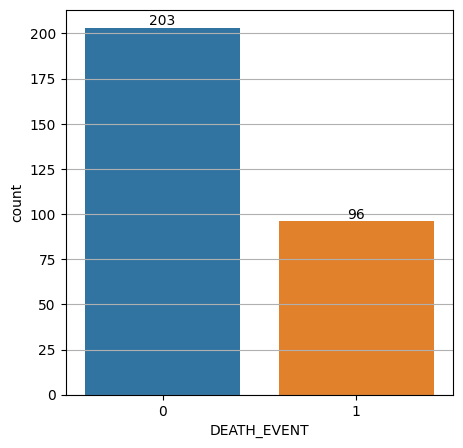

In [5]:
dataset["DEATH_EVENT"].unique()
plt.figure(figsize= (5, 5))
deaths = sns.countplot(x = dataset["DEATH_EVENT"])
deaths.bar_label(deaths.containers[0])
plt.grid(axis = 'y')


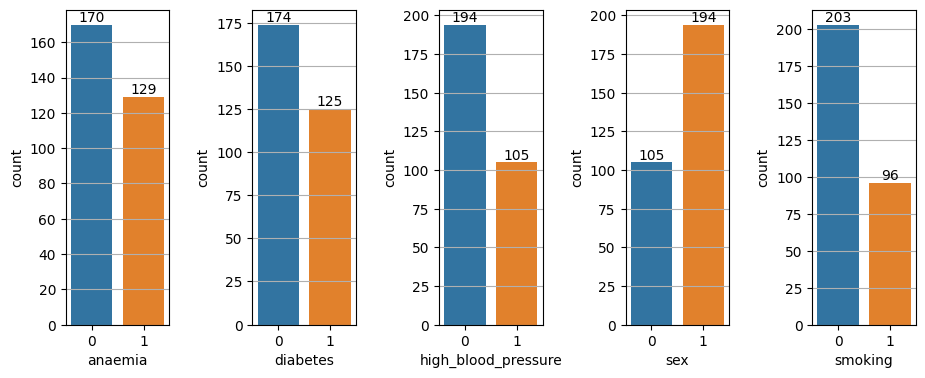

In [6]:
def PlotData(features):
    graphic = plt.figure(figsize= (10, 3))    
    pltNum = 1
    for mem in features:
        sub_plot = plt.subplot(1, len(features), pltNum)
        sns.countplot(x = dataset[mem])
        sub_plot.bar_label(sub_plot.containers[0])
        plt.grid(axis = 'y')
        pltNum += 1
    plt.subplots_adjust(left=0.05, bottom=0.05,right=0.9,top=1.1,wspace=0.8,hspace=0.1)
    plt.show()

PlotData([ "anaemia", "diabetes", "high_blood_pressure", "sex", "smoking" ])

_NOTES_
* It is more likely to live rather than die 
* Most people  in the study are men
* Most people  in the study are not smokers 

Explanations:
* Diverging_palette: https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
* Heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html

<AxesSubplot: >

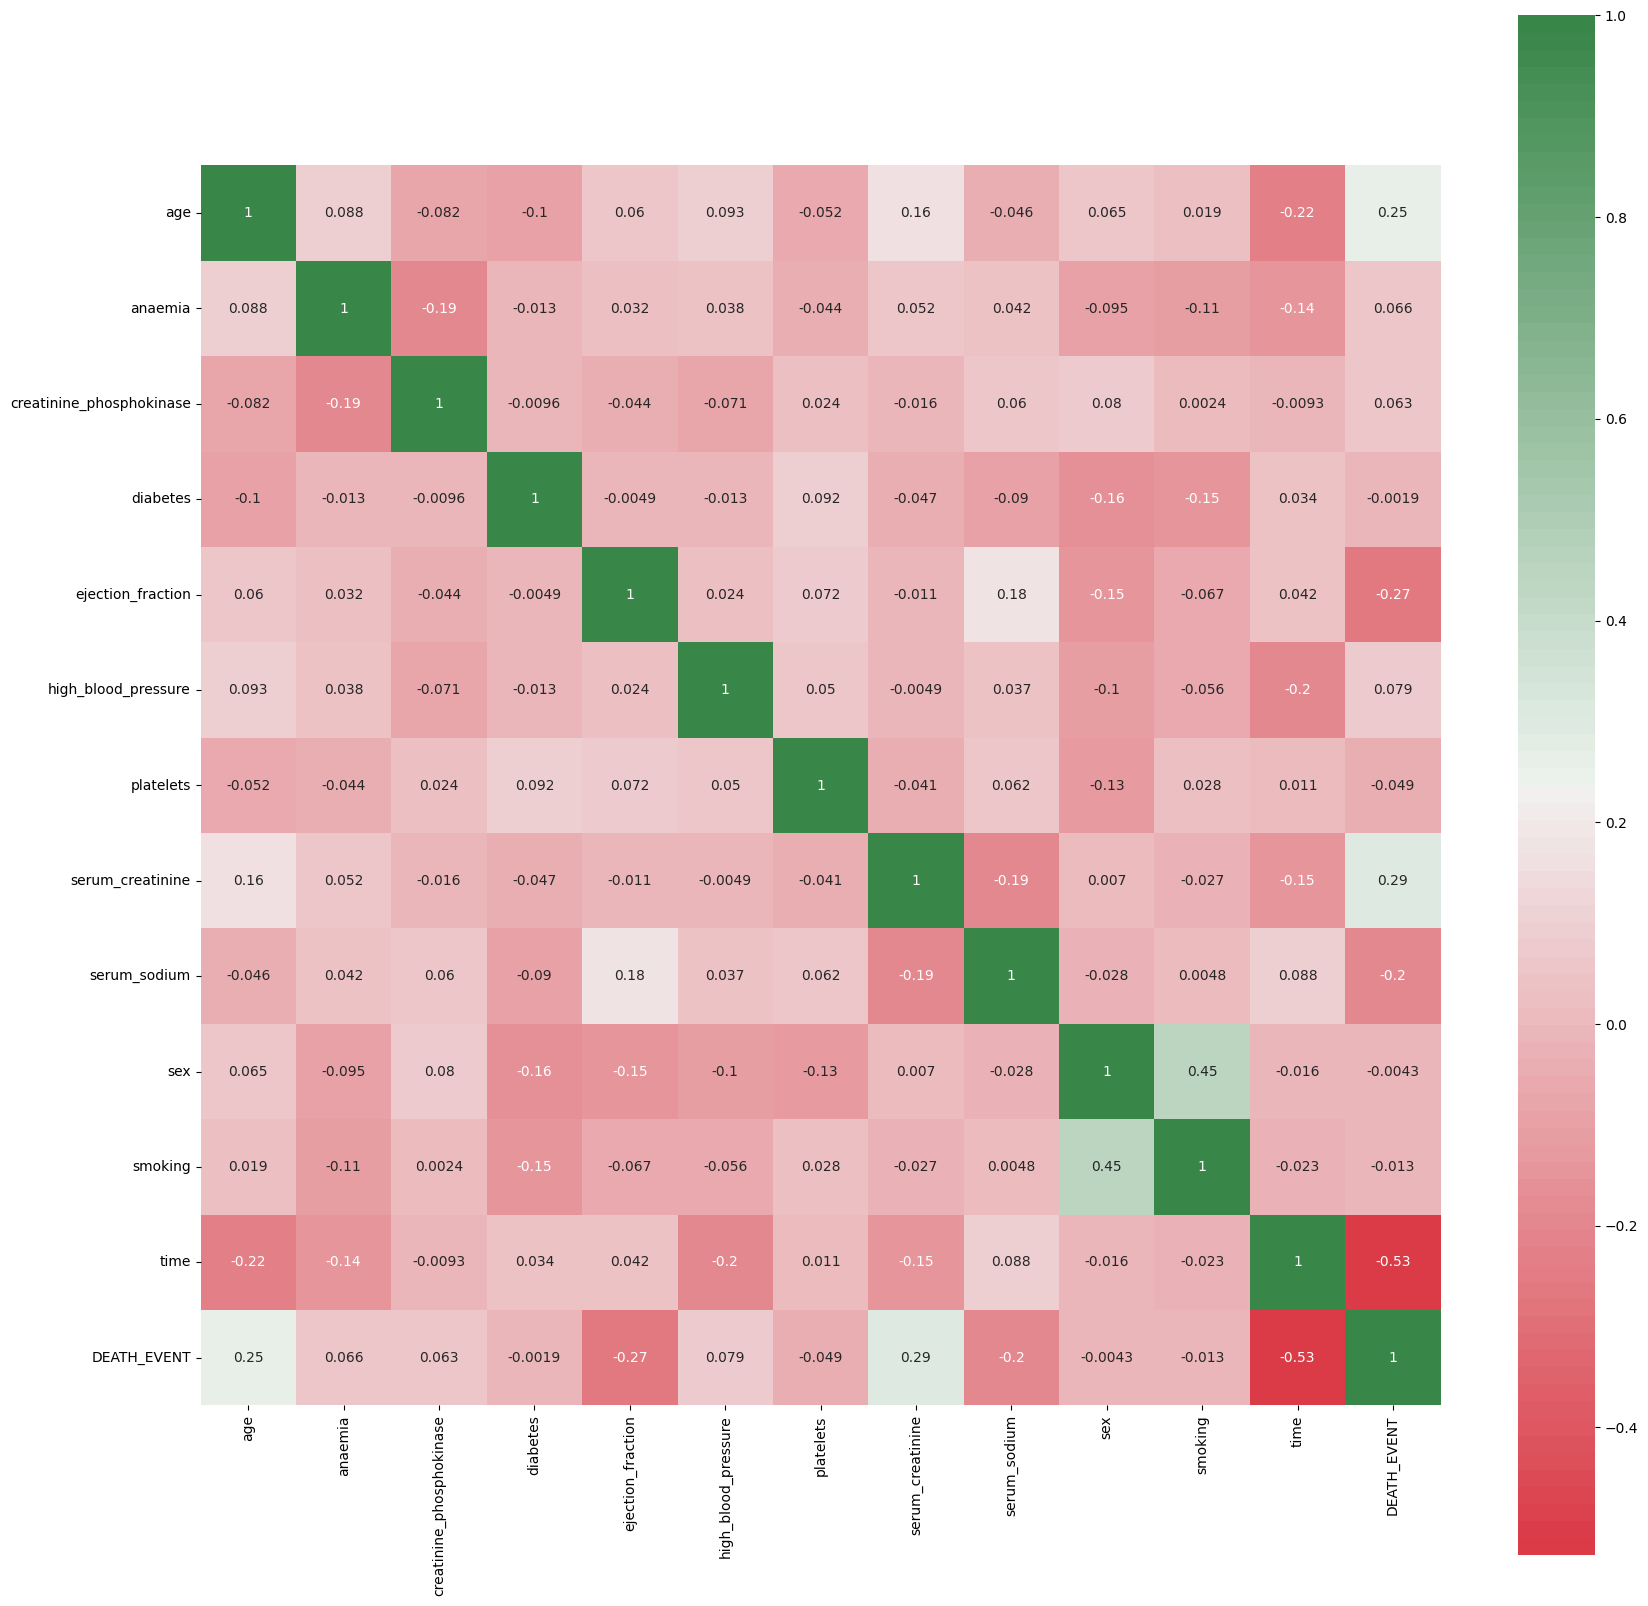

In [93]:
correlation_map = sns.diverging_palette(10, 133, s=75, l=50, n=90, center='light')
corr_dataset = dataset.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr_dataset, cmap = correlation_map, annot=True, square=True)

Now let's see how is the age's people in the study

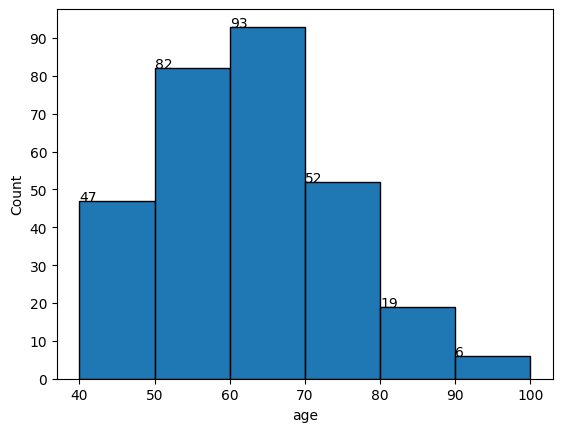

In [26]:
from scipy.stats import skew

n_bins=6

arr = plt.hist(dataset["age"], bins= n_bins, range = (40, 100))
sns.histplot(x = dataset["age"], bins= n_bins, binrange = (40,100))
plt.yticks(np.arange(0, 100, 10))

for i in range(n_bins):
    plt.text(arr[1][i],arr[0][i],str(int(arr[0][i])))

Most of the patient are between 50 an 80 years old, with only 6 above 90 years old